In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Cài đặt style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)


In [23]:

# Đọc dữ liệu đã làm sạch
df = pd.read_csv("../../data_use/bbc_cleaned.csv")

print(f"Tổng số văn bản: {len(df)}")
print(f"Các nhãn: {df['labels'].unique()}")


Tổng số văn bản: 2218
Các nhãn: ['business' 'entertainment' 'politics' 'sport' 'tech']


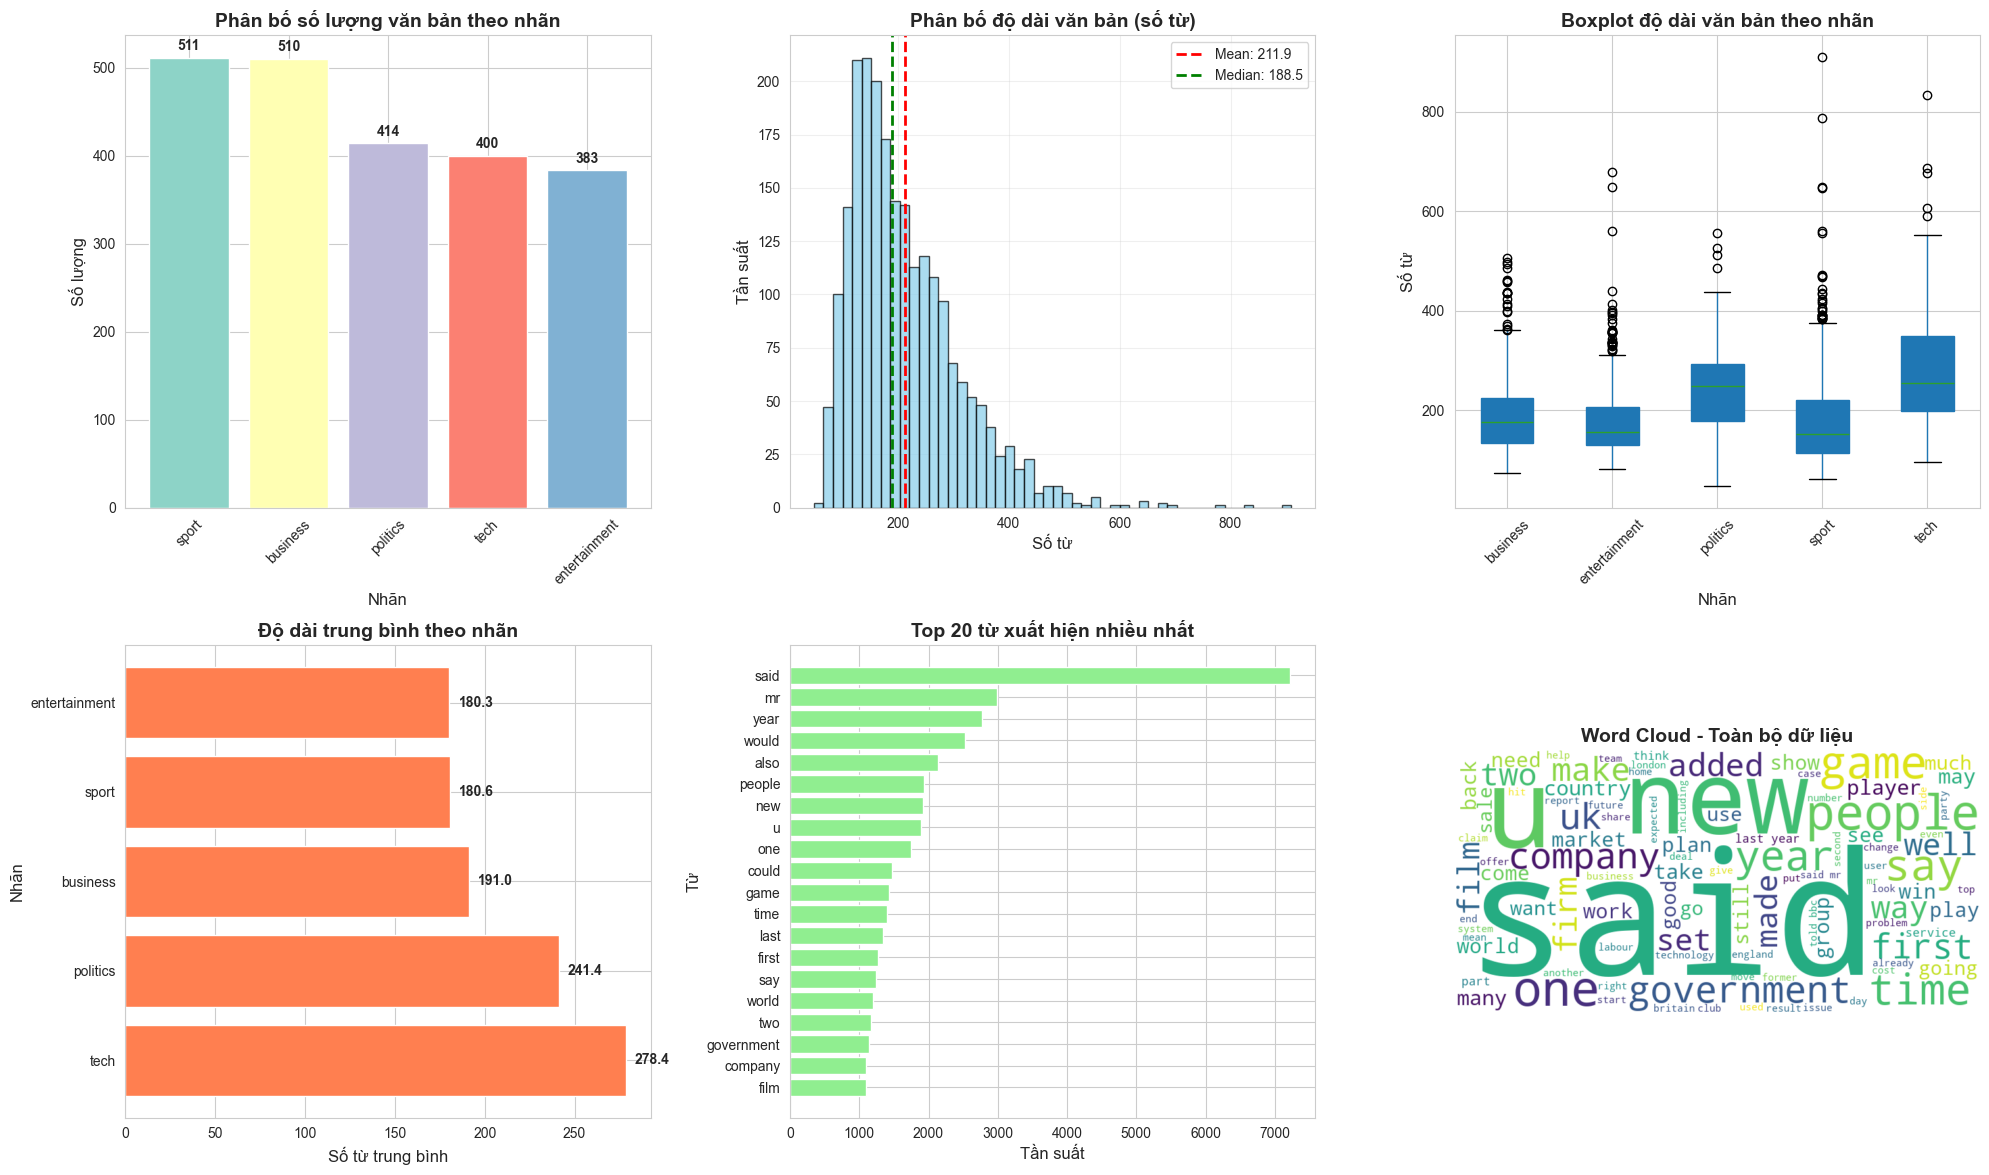

In [24]:
word_count = df['cleaned_text'].apply(lambda x: len(str(x).split()))

# ===== TẠO FIGURE VỚI NHIỀU SUBPLOTS =====
fig = plt.figure(figsize=(20, 12))

# 1. Phân bố nhãn
ax1 = plt.subplot(2, 3, 1)
label_counts = df['labels'].value_counts()
colors = plt.cm.Set3(range(len(label_counts)))
ax1.bar(label_counts.index, label_counts.values, color=colors)
ax1.set_title('Phân bố số lượng văn bản theo nhãn', fontsize=14, fontweight='bold')
ax1.set_xlabel('Nhãn', fontsize=12)
ax1.set_ylabel('Số lượng', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(label_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Phân bố độ dài văn bản
ax2 = plt.subplot(2, 3, 2)
ax2.hist(word_count, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax2.axvline(word_count.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {word_count.mean():.1f}')
ax2.axvline(word_count.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {word_count.median():.1f}')
ax2.set_title('Phân bố độ dài văn bản (số từ)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Số từ', fontsize=12)
ax2.set_ylabel('Tần suất', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Boxplot độ dài theo nhãn
ax3 = plt.subplot(2, 3, 3)
tmp_df = df.copy()
tmp_df['word_count'] = word_count
tmp_df.boxplot(column='word_count', by='labels', ax=ax3, patch_artist=True)
ax3.set_title('Boxplot độ dài văn bản theo nhãn', fontsize=14, fontweight='bold')
ax3.set_xlabel('Nhãn', fontsize=12)
ax3.set_ylabel('Số từ', fontsize=12)
plt.sca(ax3)
plt.xticks(rotation=45)
plt.suptitle('')

# 4. Thống kê độ dài trung bình theo nhãn
ax4 = plt.subplot(2, 3, 4)
avg_length = tmp_df.groupby('labels')['word_count'].mean().sort_values(ascending=False)
ax4.barh(avg_length.index, avg_length.values, color='coral')
ax4.set_title('Độ dài trung bình theo nhãn', fontsize=14, fontweight='bold')
ax4.set_xlabel('Số từ trung bình', fontsize=12)
ax4.set_ylabel('Nhãn', fontsize=12)
for i, v in enumerate(avg_length.values):
    ax4.text(v + 5, i, f'{v:.1f}', va='center', fontweight='bold')

# 5. Top 20 từ xuất hiện nhiều nhất
ax5 = plt.subplot(2, 3, 5)
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
top_20 = dict(word_freq.most_common(20))
ax5.barh(list(top_20.keys())[::-1], list(top_20.values())[::-1], color='lightgreen')
ax5.set_title('Top 20 từ xuất hiện nhiều nhất', fontsize=14, fontweight='bold')
ax5.set_xlabel('Tần suất', fontsize=12)
ax5.set_ylabel('Từ', fontsize=12)

# 6. Word Cloud tổng thể
ax6 = plt.subplot(2, 3, 6)
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100).generate(' '.join(df['cleaned_text']))
ax6.imshow(wordcloud, interpolation='bilinear')
ax6.axis('off')
ax6.set_title('Word Cloud - Toàn bộ dữ liệu', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('img/bbc_data_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


Độ dài văn bản (số từ):
  - Min: 48
  - Max: 910
  - Mean: 211.92
  - Median: 188.50
  - Std: 98.57

Thống kê theo nhãn:
               count    mean  min  max
labels                                
business         510  190.96   75  506
entertainment    383  180.35   82  679
politics         414  241.38   48  556
sport            511  180.57   62  910
tech             400  278.44   96  834

Tổng số từ khác nhau (vocabulary size): 27459
Tổng số từ: 470043



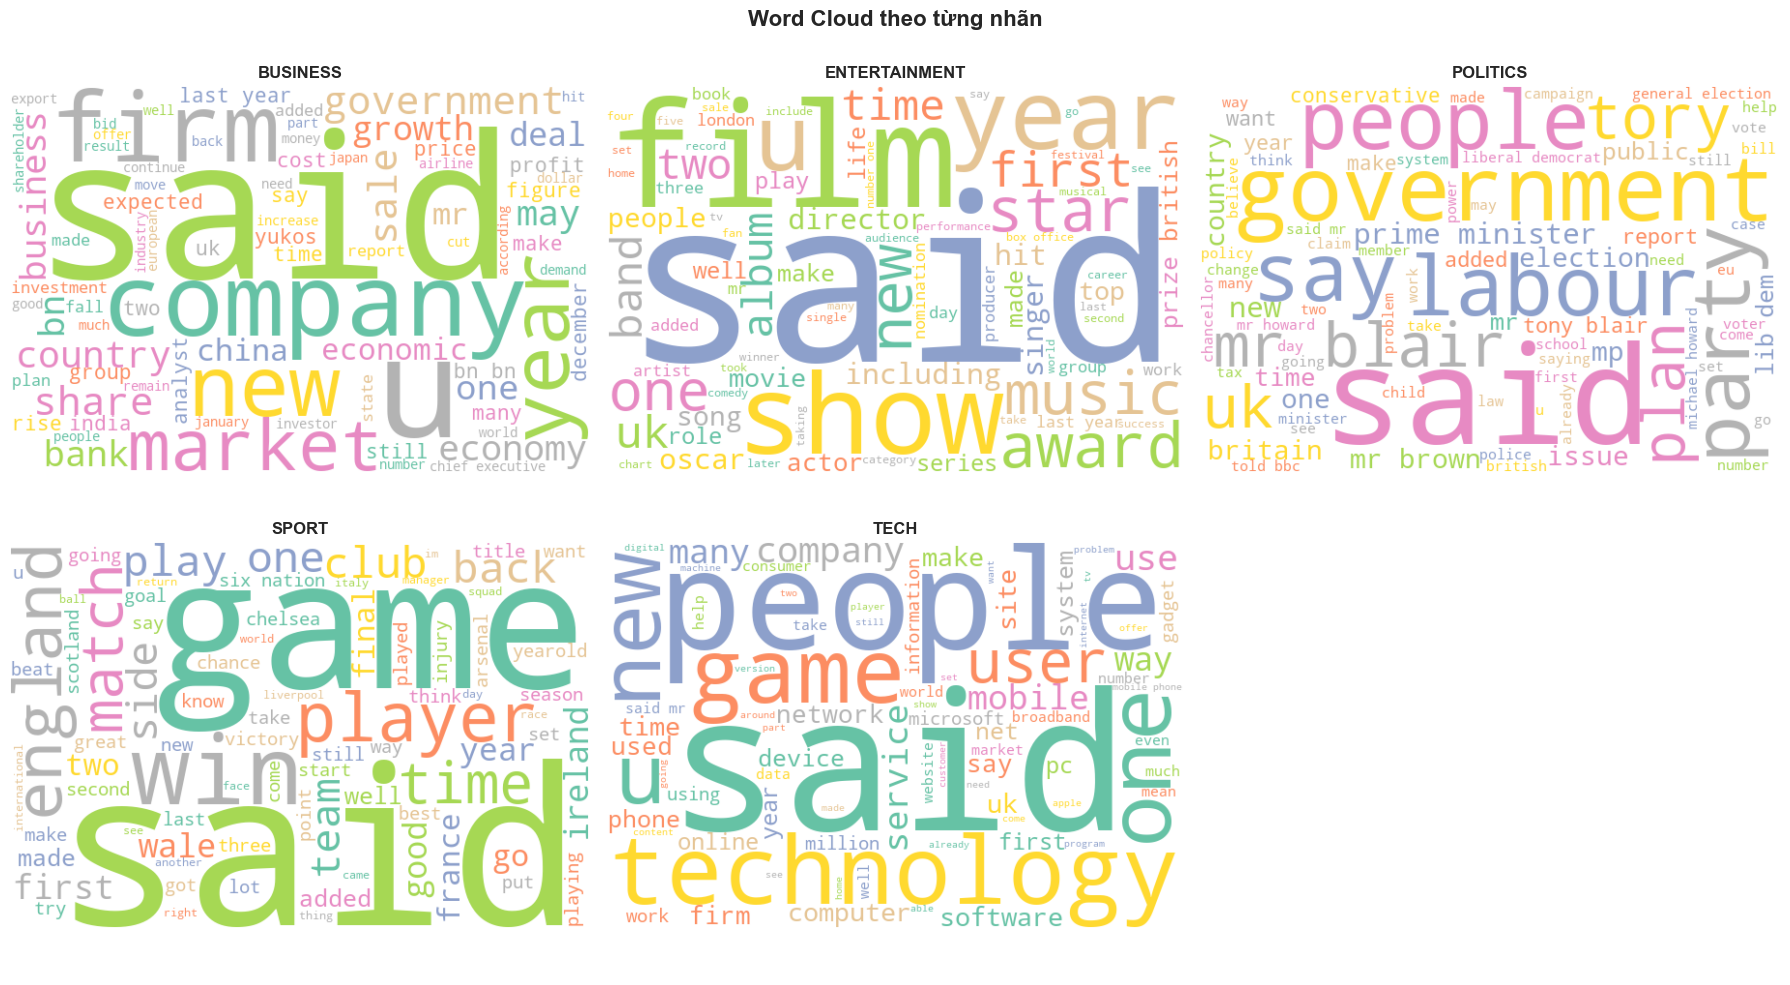


Đã lưu các hình ảnh:
  - img/bbc_data_visualization.png
  - img/bbc_wordcloud_by_label.png


In [25]:
print(f"\nĐộ dài văn bản (số từ):")
print(f"  - Min: {word_count.min()}")
print(f"  - Max: {word_count.max()}")
print(f"  - Mean: {word_count.mean():.2f}")
print(f"  - Median: {word_count.median():.2f}")
print(f"  - Std: {word_count.std():.2f}")

print(f"\nThống kê theo nhãn:")
print(tmp_df.groupby('labels')['word_count'].agg(['count', 'mean', 'min', 'max']).round(2))

print(f"\nTổng số từ khác nhau (vocabulary size): {len(word_freq)}")
print(f"Tổng số từ: {sum(word_freq.values())}")

print("\n" + "="*60)

# ===== WORD CLOUD THEO NHÃN =====
fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Word Cloud theo từng nhãn', fontsize=16, fontweight='bold')

for idx, label in enumerate(df['labels'].unique()):
    row = idx // 3
    col = idx % 3
    
    text = ' '.join(df[df['labels'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=600, height=400,
                         background_color='white',
                         colormap='Set2',
                         max_words=80).generate(text)
    
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{label.upper()}', fontsize=12, fontweight='bold')

# Ẩn subplot thừa
for idx in range(len(df['labels'].unique()), 6):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('img/bbc_wordcloud_by_label.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nĐã lưu các hình ảnh:")
print("  - img/bbc_data_visualization.png")
print("  - img/bbc_wordcloud_by_label.png")